In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Задание 1

Используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

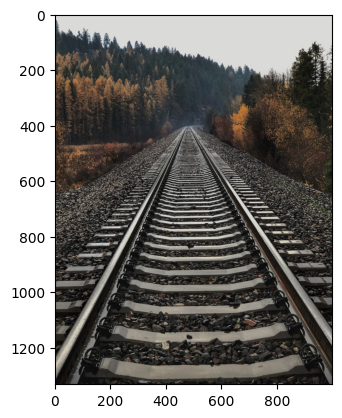

In [96]:
img = cv.cvtColor(cv.imread("railway.jpeg"), cv.COLOR_BGR2RGB)
plt.imshow(img)

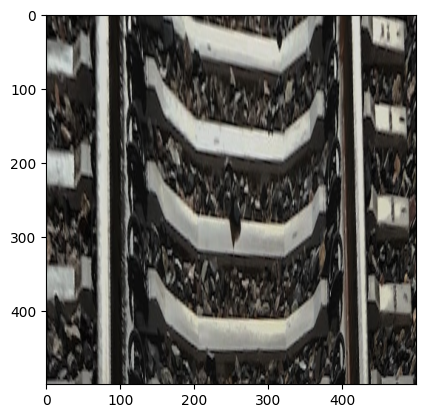

In [97]:
height, width = 500, 500
pts1 = [[185, 785], [850, 750], [90, 910], [975, 900]]
pts2 = [[0, 0], [width, 0], [0, height], [width, height]]

M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(img, M, (width, height))
plt.imshow(img_res)

## Задание 2

Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке.

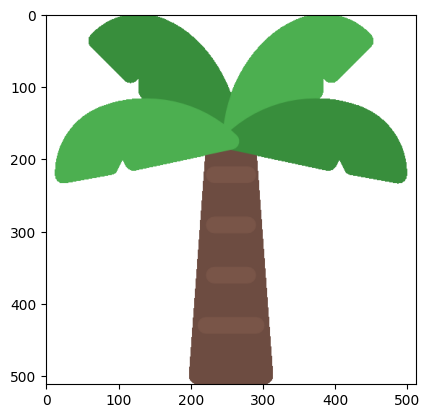

In [250]:
img = cv.cvtColor(cv.imread("palm.png"), cv.COLOR_BGR2RGB)
plt.imshow(img)

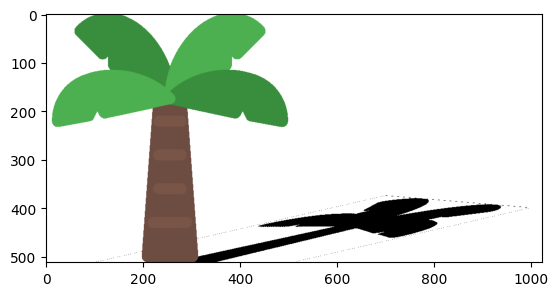

In [281]:
height, width = img.shape[:2]

pts1 = [[0, 0], [512, 0], [0, 512]]
pts2 = [[700, 375], [1000, 400], [100, 512]]

M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpAffine(img, M, (width*2, height))
img_res = np.where(img_res == 0, 255, img_res)
img_res = np.where(img_res != 255, 0, img_res)

for i in range(height):
  for j in range(width):
    if (img[i, j] != 255).all():
      img_res[i, j] = img[i, j]


plt.imshow(img_res)